# SI 699: Project Proposal

## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Fall 25 (Second Year MSI)/SI 611: Mastery Course/hcV3-stories.csv")

In [ ]:
df.sample(5)

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,mostSurprising,openness,recAgnPairId,recImgPairId,similarity,similarityReason,story,stressful,summary,timeSinceEvent
6268,3XC1O3LBOT8TVDHIQ89IJMTJO12LT7,645,AJFU1HG5,25.0,man,white,1.0,1.0,5.0,5.0,...,we found out we were having a baby.,0.125,NaN,3XC1O3LBOT8TVDHIQ89IJMTJO12LT7,NaN,NaN,"Last year, My Fiance and I decided we wanted a...",1.0,Me and my fiance were trying for a child for a...,150.0
5258,3SB4CE2TJWHJGBZYYRLPZBYE54RAXX,948,PDDKMUPE,25.0,man,white,1.0,2.0,5.0,5.0,...,"When my friend said ""They out here""",0.625,3SB4CE2TJWHJGBZYYRLPZBYE54RAXX,3SB4CE2TJWHJGBZYYRLPZBYE54RAXX,NaN,NaN,This story takes place about three months ago....,2.0,Me and my friends planned a psychedelic trip t...,90.0
4994,3R2PKQ87NXUNSHJSW8BT5S6ZDPDMIU,6810,PTZBBNPN,30.0,woman,black,2.0,4.0,3.0,4.0,...,I admit that the fight got physical and I seco...,1.000,3R2PKQ87NXUNSHJSW8BT5S6ZDPDMIU,3R2PKQ87NXUNSHJSW8BT5S6ZDPDMIU,NaN,NaN,"Dear Journal,When it happens, we're usually dr...",4.0,HUSBAND and I got into a fight. It made me que...,60.0
2686,3EF8EXOTT2HMR3H9L4DVX1XXG3A1JQ,1960,J4UL0YWQ,35.0,man,asian,2.0,2.0,NaN,4.0,...,my husband said he enjoyed the time off work.,0.500,NaN,3FE2ERCCZYU396R8MJGQ6TWGU4UPOX,2.0,I've never had anything of major value stolen ...,"Dear Diary, it was a very hard two months afte...",2.0,My family suffered when my husband's work truc...,180.0
2928,3H7XDTSHKDD5127BAMHDTEVAN4FGWA,2642,0MW7XJIW,45.0,woman,white,2.0,5.0,3.0,5.0,...,her family being there from out of town,-0.750,3H7XDTSHKDD5127BAMHDTEVAN4FGWA,3H7XDTSHKDD5127BAMHDTEVAN4FGWA,NaN,NaN,My mother-in-laws 60th birthday was in July an...,5.0,I planned a surprise birthday party for my mot...,28.0


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6854 entries, 0 to 6853
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AssignmentId       6854 non-null   object 
 1   WorkTimeInSeconds  6854 non-null   int64  
 2   WorkerId           6854 non-null   object 
 3   annotatorAge       6831 non-null   float64
 4   annotatorGender    6854 non-null   object 
 5   annotatorRace      6854 non-null   object 
 6   distracted         6854 non-null   float64
 7   draining           6854 non-null   float64
 8   frequency          4098 non-null   float64
 9   importance         6710 non-null   float64
 10  logTimeSinceEvent  6854 non-null   float64
 11  mainEvent          6854 non-null   object 
 12  memType            6854 non-null   object 
 13  mostSurprising     6854 non-null   object 
 14  openness           6854 non-null   float64
 15  recAgnPairId       2619 non-null   object 
 16  recImgPairId       5328 

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
AssignmentId,6854,6854,3YW4XOSQKR7V5JS3X3H943670Y51UE,1
WorkerId,6854,3640,NNDUB232,94
annotatorGender,6854,7,woman,3422
annotatorRace,6854,10,white,5044
mainEvent,6854,6323,about my cousin's wedding,9
memType,6854,3,recalled,2779
mostSurprising,6854,6584,when I unexpectedly fell in love,4
recAgnPairId,2619,1309,3O7L7BFSHFBPGTRFFANASK1QUPQEIV,3
recImgPairId,5328,2572,3Q8GYXHFEQOY77CMCZYLDNXI6S2C5P,10
similarityReason,2756,2513,{},43


In [ ]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
WorkTimeInSeconds,6854.0,2.094556e+03,1.694784e+03,173.00000,924.250000,1526.00000,2678.500000,1.068000e+04
annotatorAge,6831.0,3.355351e+01,1.014654e+01,18.00000,25.000000,30.00000,40.000000,5.500000e+01
distracted,6854.0,1.416837e+00,8.908060e-01,1.00000,1.000000,1.00000,1.000000,5.000000e+00
draining,6854.0,2.182521e+00,1.310124e+00,1.00000,1.000000,2.00000,3.000000,5.000000e+00
frequency,4098.0,3.646413e+00,1.028357e+00,1.00000,3.000000,4.00000,4.000000,5.000000e+00
importance,6710.0,3.952608e+00,1.258208e+00,1.00000,3.000000,4.00000,5.000000,5.000000e+00
logTimeSinceEvent,6854.0,7.001817e+00,1.320011e+01,1.94591,3.555348,4.49981,5.010635,1.368181e+02
openness,6854.0,5.593996e-01,4.164938e-01,-1.00000,0.250000,0.62500,0.875000,1.000000e+00
similarity,2756.0,2.916546e+00,1.441768e+00,1.00000,2.000000,3.00000,4.000000,5.000000e+00
stressful,6854.0,2.168223e+00,1.325316e+00,1.00000,1.000000,2.00000,3.000000,5.000000e+00


In [ ]:
# Check how many missing values in each column
df.isna().mean().sort_values(ascending=False)

,0
recAgnPairId,0.617887
similarity,0.597899
similarityReason,0.597899
frequency,0.402101
recImgPairId,0.222644
importance,0.021010
annotatorAge,0.003356
AssignmentId,0.000000
draining,0.000000
distracted,0.000000


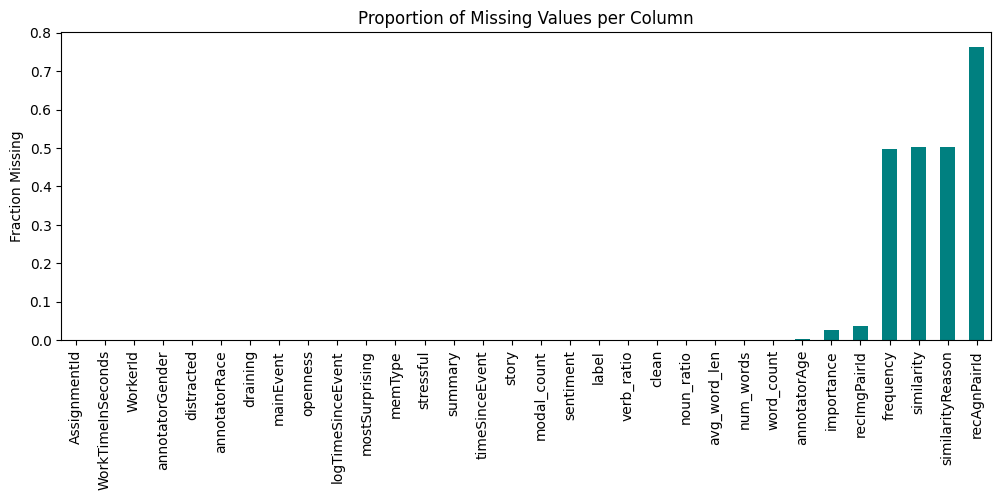

In [ ]:
(df.isna().sum()/len(df)).sort_values().plot(kind='bar', figsize=(12,4), color='teal')
plt.title("Proportion of Missing Values per Column")
plt.ylabel("Fraction Missing")
plt.show()


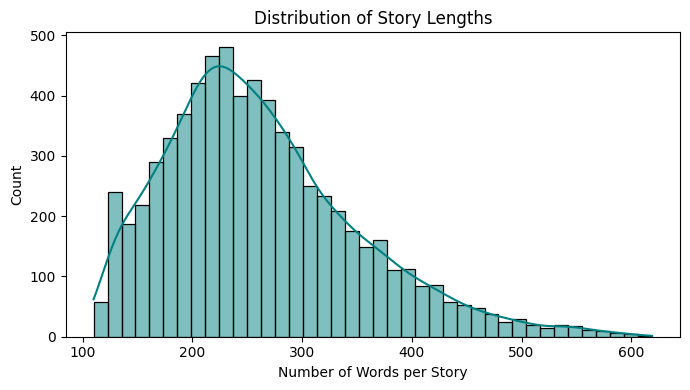

,story_length
count,6854.000000
mean,262.616574
std,88.232458
min,110.000000
25%,200.000000
50%,249.000000
75%,311.000000
max,619.000000


In [ ]:
# Compute story length in words
df['story_length'] = df['story'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(7,4))
sns.histplot(df['story_length'], bins=40, kde=True, color='teal')
plt.title("Distribution of Story Lengths")
plt.xlabel("Number of Words per Story")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Optional: basic descriptive stats
df['story_length'].describe()


/tmp/ipython-input-1503370231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='memType', y='story_length', palette='muted')


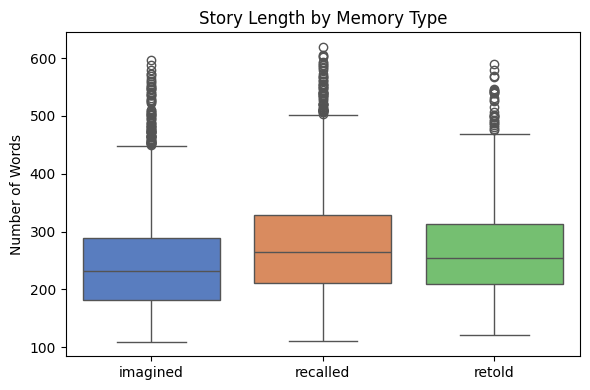

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='memType', y='story_length', palette='muted')
plt.title("Story Length by Memory Type")
plt.xlabel("")
plt.ylabel("Number of Words")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1025668673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='memType', y='story_length', palette='muted')


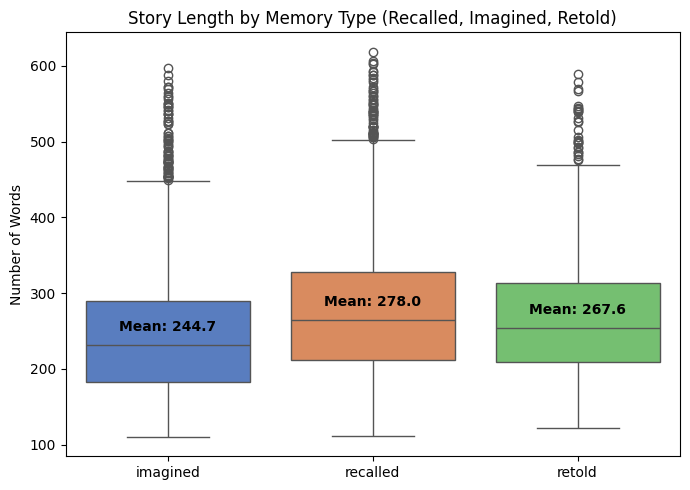

In [ ]:
# Compute story length in words
df['story_length'] = df['story'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(7,5))
ax = sns.boxplot(data=df, x='memType', y='story_length', palette='muted')

# Add mean values on each box
means = df.groupby('memType')['story_length'].mean().round(1)
for i, mean in enumerate(means):
    ax.text(i, mean + 5, f"Mean: {mean}", ha='center', color='black', fontweight='bold')

plt.title("Story Length by Memory Type (Recalled, Imagined, Retold)")
plt.xlabel("")
plt.ylabel("Number of Words")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1081070175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='memType', palette='muted')


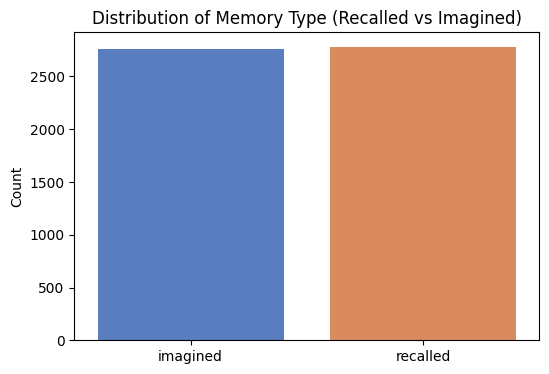

,proportion
memType,
recalled,0.502078
imagined,0.497922


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='memType', palette='muted')
plt.title("Distribution of Memory Type (Recalled vs Imagined)")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

df['memType'].value_counts(normalize=True)


In [ ]:
df.memType.value_counts()

,count
memType,
recalled,2779
imagined,2756
retold,1319


/tmp/ipython-input-573381595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='memType', palette='muted')


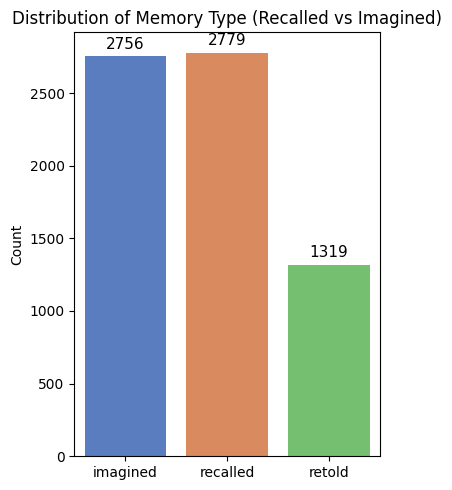

,proportion
memType,
recalled,0.405457
imagined,0.402101
retold,0.192442


In [ ]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data=df, x='memType', palette='muted')

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3)

plt.title("Distribution of Memory Type (Recalled vs Imagined)")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Display proportion of each category
df['memType'].value_counts(normalize=True)


In [ ]:
print(df['memType'].value_counts())

# Randomly sample one example of each narrative type
for mem_type in df['memType'].unique():
    example = df[df['memType'] == mem_type]['story'].dropna().sample(1).values[0]
    print(f"\n=== Example {mem_type.upper()} Story ===\n")
    print(example)
    print("\n" + "-"*80)

memType
recalled    2779
imagined    2756
retold      1319
Name: count, dtype: int64

=== Example IMAGINED Story ===

While her friends seemed amicable I got a strange vibe from them.  Trying to be friendly I asked where in Africa they were going.  They gave me a strange look, said something in foreign language and left.  I paid it no mind and shut the door.  I continued to see my neighbor sporadically throughout the weeks and things were friendly.  I stopped my exercise routine and joined a gym.  My apartment is much to small for exercising anyway.  One day while in the elevator I saw my neighbor and asked how her friends' trip was.  She said they were still there but should be back soon.  The elevator door then opened and I stepped out and wished her good day.  Two weeks later there was a knock on my door.  It was my downstairs neighbor accompanied by her two friends from before.  I greeted them and asked if I was being too loud.  I had recently been cleaning and my music and horribl

In [ ]:
for col in ['annotatorGender','annotatorRace']:
    print(f"\n{col} value counts:\n")
    print(df[col].value_counts(dropna=False))


annotatorGender value counts:

annotatorGender
man           2750
woman         2728
na              25
nonBinary       18
transman         9
other            3
transwoman       2
Name: count, dtype: int64

annotatorRace value counts:

annotatorRace
white            4070
black             565
asian             317
hisp              316
other             123
na                 55
native             38
indian             32
middleEastern      12
islander            7
Name: count, dtype: int64


/tmp/ipython-input-4142501841.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='annotatorGender', palette='coolwarm')


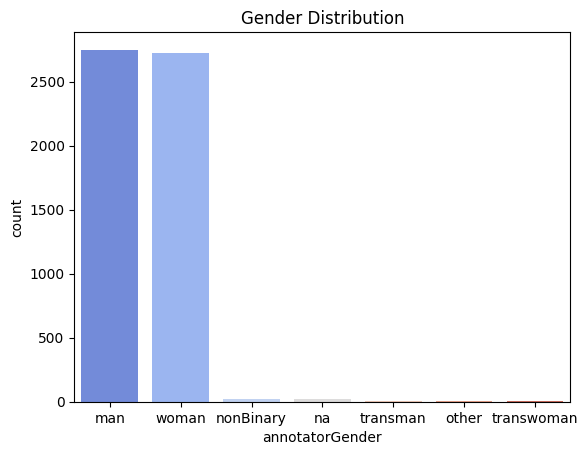

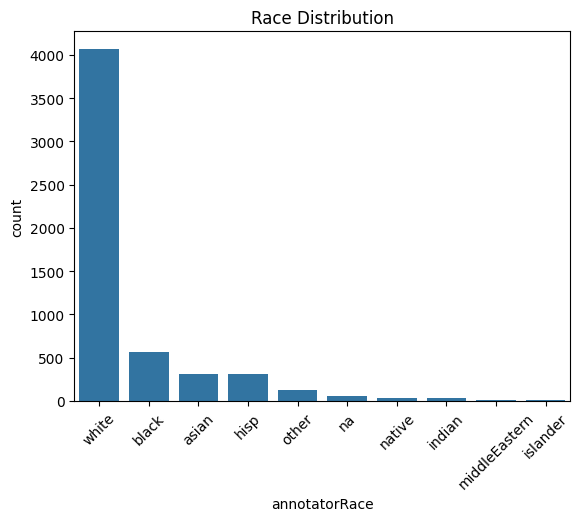

In [ ]:
sns.countplot(data=df, x='annotatorGender', palette='coolwarm')
plt.title("Gender Distribution")
plt.show()

sns.countplot(data=df, x='annotatorRace', order=df['annotatorRace'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Race Distribution")
plt.show()


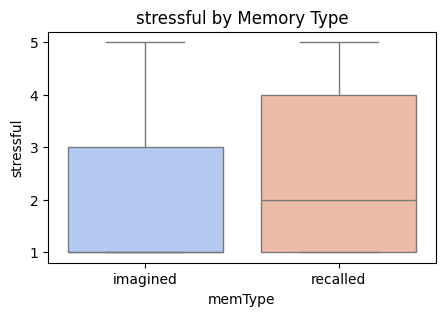

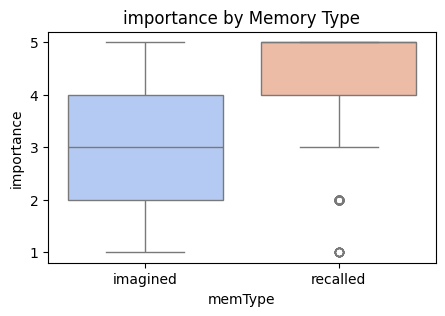

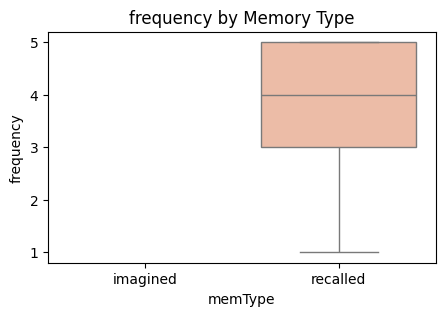

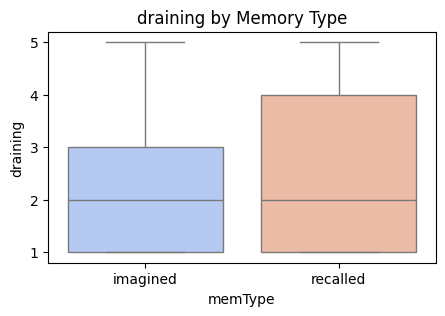

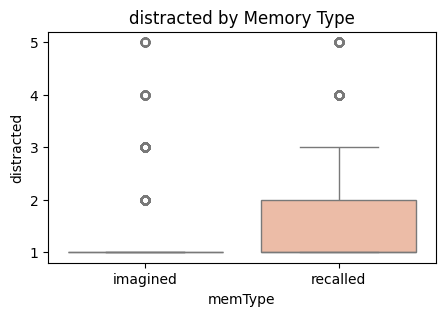

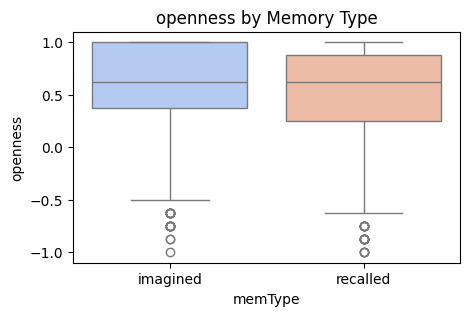

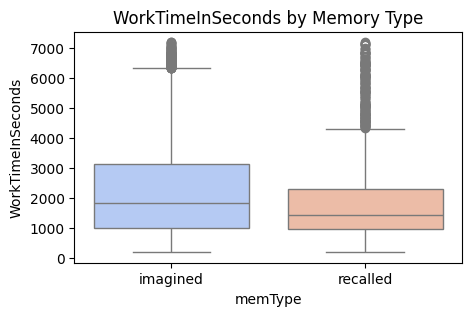

In [ ]:
cog_vars = ['stressful','importance','frequency','draining','distracted','openness','WorkTimeInSeconds']
for col in cog_vars:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x='memType', y=col, palette='coolwarm', hue = 'memType', legend = False)
    plt.title(f"{col} by Memory Type")
    plt.show()


In [ ]:
text_cols = ['mainEvent','summary','story','similarityReason']
for col in text_cols:
    print(f"\nColumn: {col}")
    print("Average length:", df[col].astype(str).apply(len).mean())
    print("Example entry:\n", df[col].dropna().sample(1).values[0][:300], "...")



Column: mainEvent
Average length: 33.505510388437216
Example entry:
 moving out after a breakup. ...

Column: summary
Average length: 177.60903342366757
Example entry:
 Coping with a family loss.  Acceptance and healing after the loss and how it affected me and everyone around me. ...

Column: story
Average length: 1343.537850045167
Example entry:
 After being together for 7 years David finally proposed to my sister Amber. He knows some of us are skeptical of him and that he is going to have to prove himself. After what happened to Ashley after Tim picked up and left her after all those years, we are all looking out for one another more than b ...

Column: similarityReason
Average length: 38.87407407407407
Example entry:
 I think its quite important to not give up on anything you hold dearly and you believe in ...


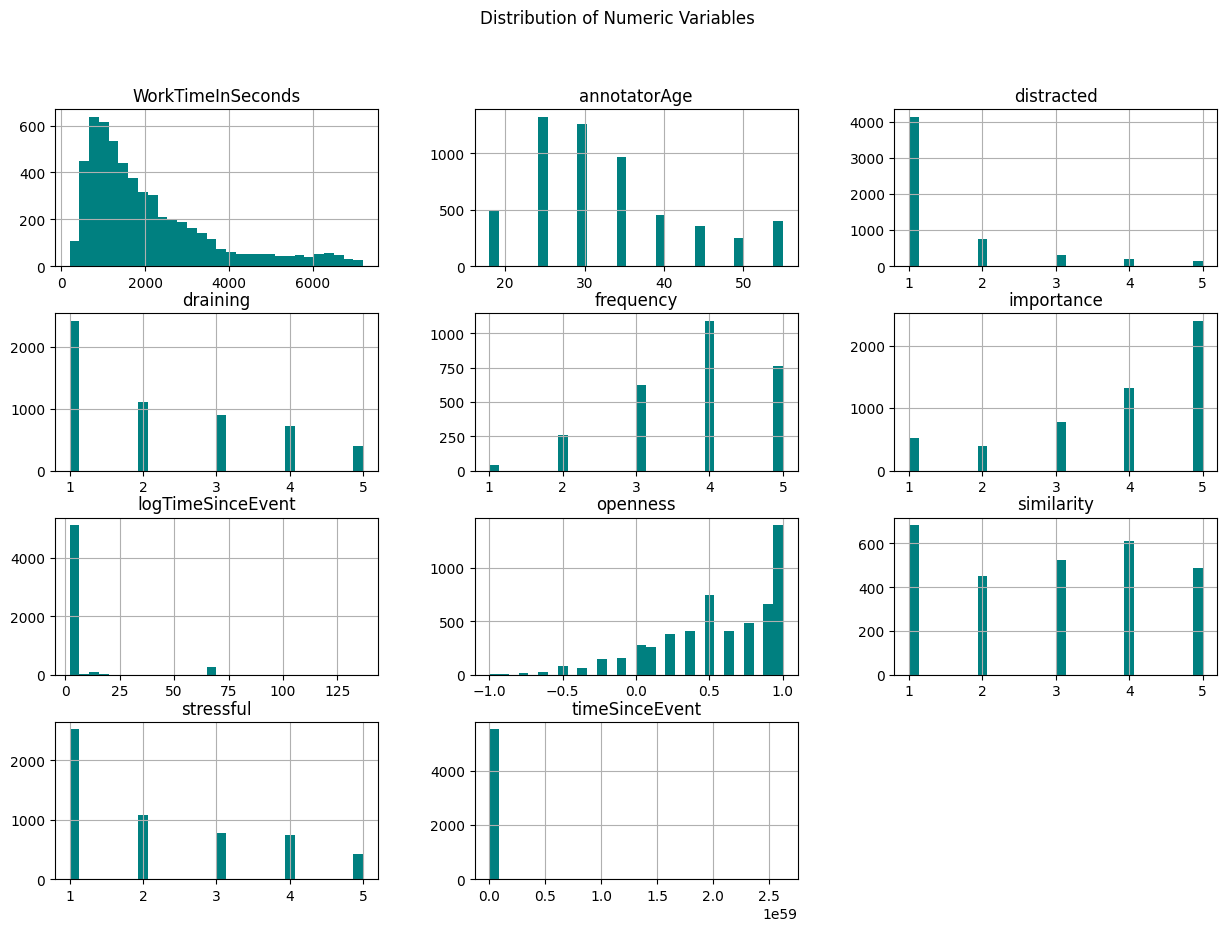

In [ ]:
numeric_cols = ['WorkTimeInSeconds','annotatorAge','distracted','draining','frequency',
                'importance','logTimeSinceEvent','openness','similarity','stressful','timeSinceEvent']

df[numeric_cols].hist(bins=30, figsize=(15,10), color='teal')
plt.suptitle("Distribution of Numeric Variables")
plt.show()


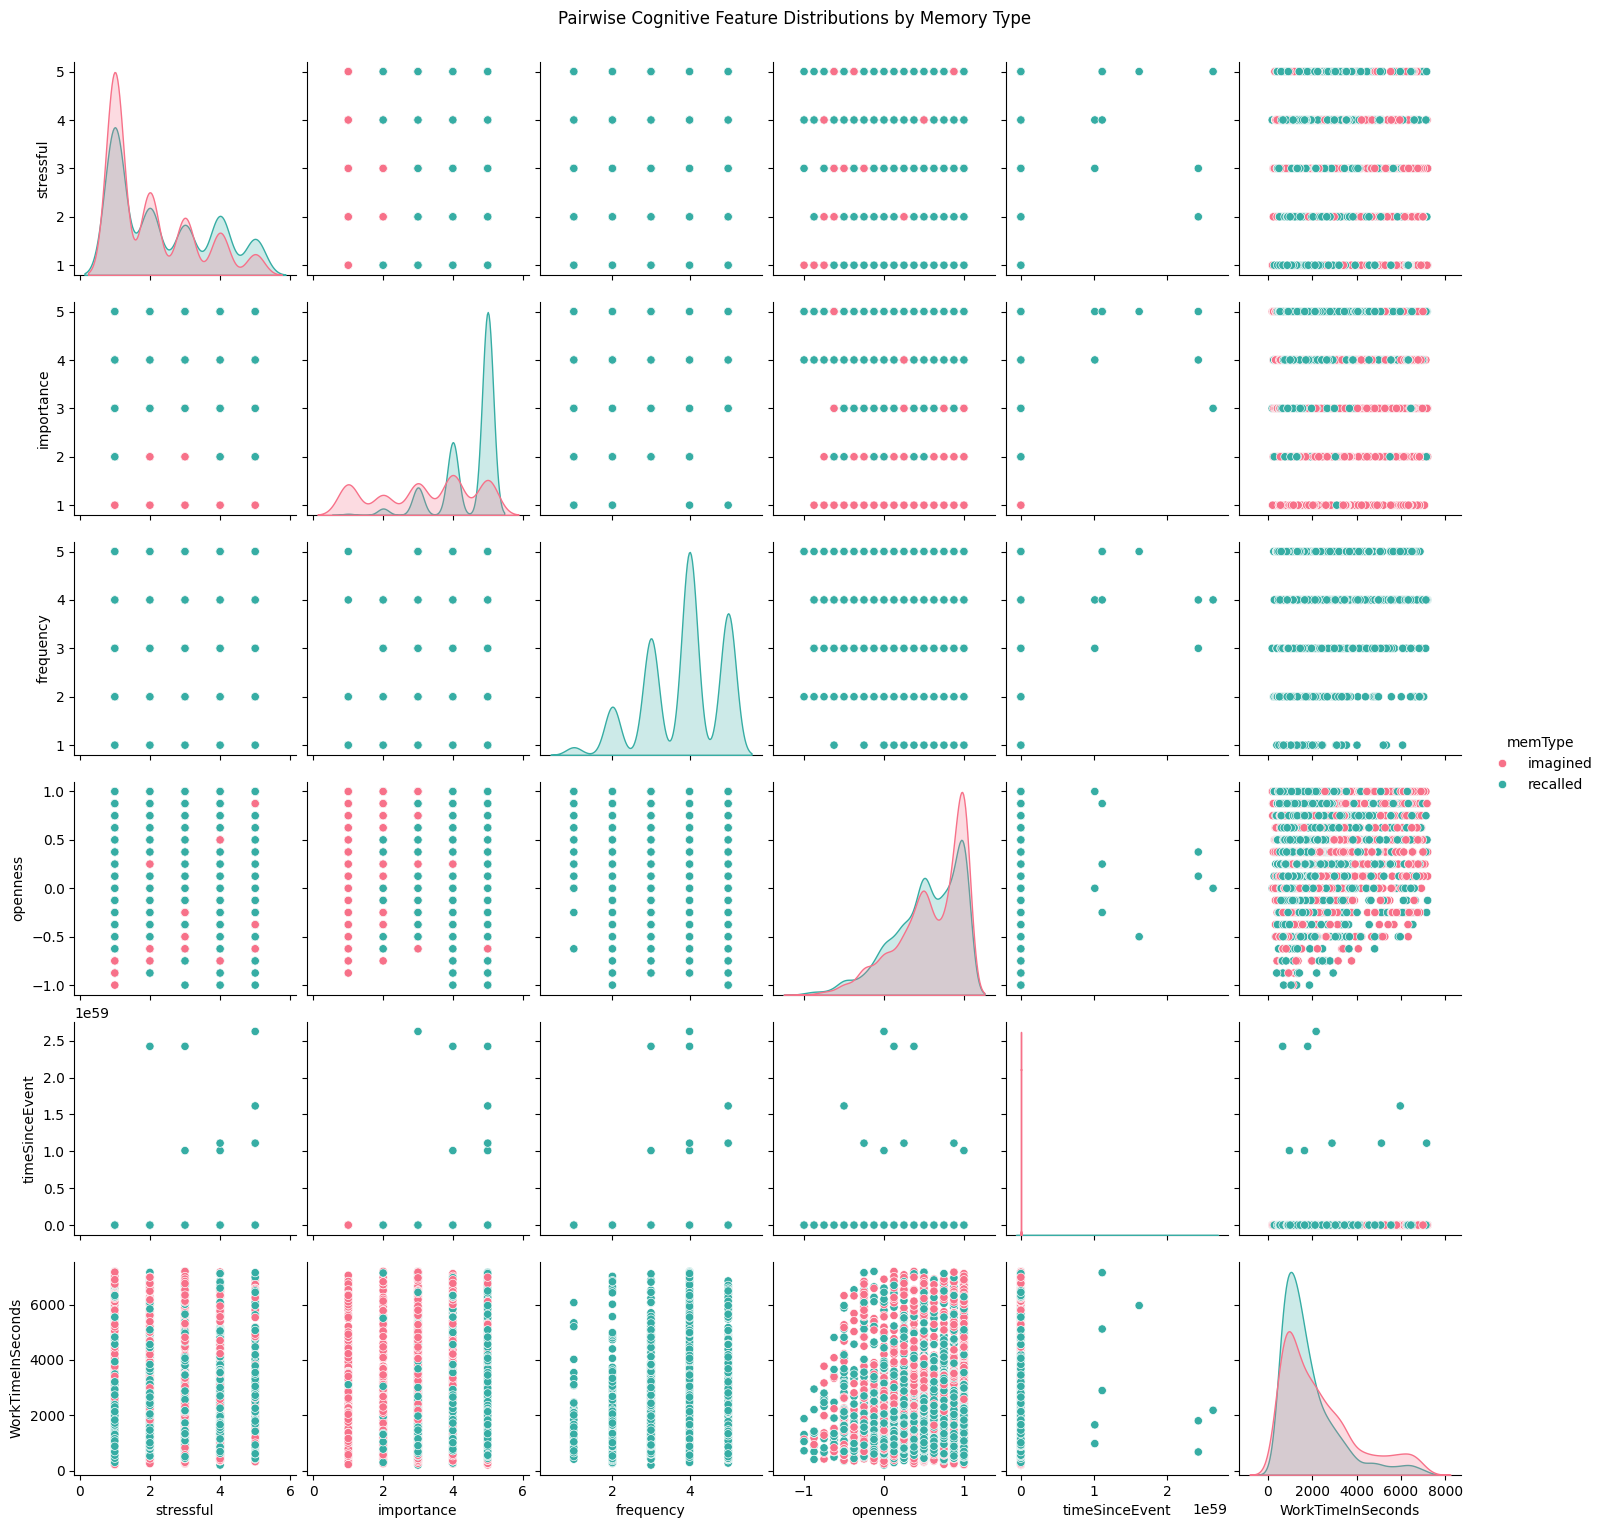

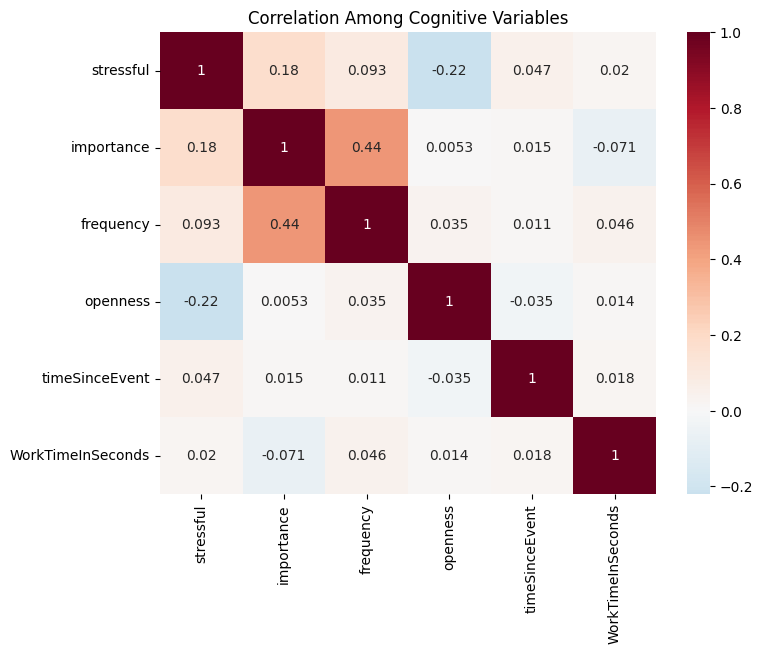

In [ ]:
cog_cols = ['stressful','importance','frequency','openness','timeSinceEvent','WorkTimeInSeconds']
sns.pairplot(df[cog_cols + ['memType']], hue='memType', diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Cognitive Feature Distributions by Memory Type", y=1.02)
plt.show()

# Quick correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[cog_cols].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title("Correlation Among Cognitive Variables")
plt.show()


/tmp/ipython-input-716074816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='memType', y='word_count', palette='coolwarm')


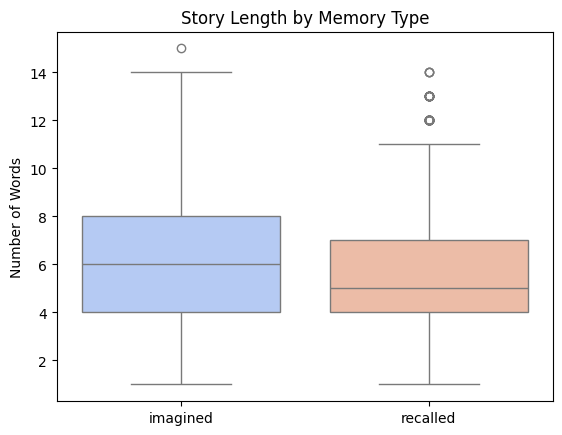

In [ ]:
df['word_count'] = df['mainEvent'].apply(lambda x: len(str(x).split()))

sns.boxplot(data=df, x='memType', y='word_count', palette='coolwarm')
plt.title("Story Length by Memory Type")
plt.xlabel("")
plt.ylabel("Number of Words")
plt.show()


/tmp/ipython-input-1468710893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='memType', y='modal_count', palette='viridis')


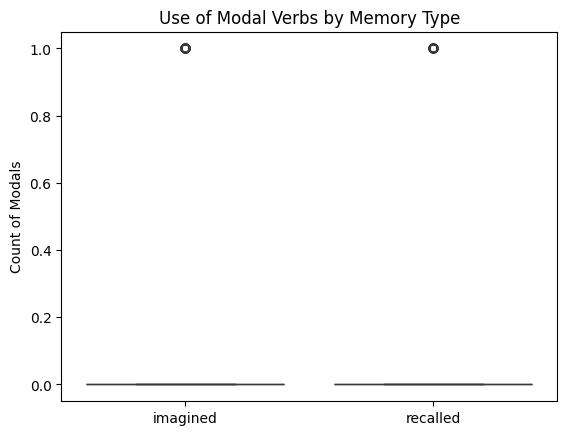

In [ ]:
modals = ['might','could','would','should','may','can','perhaps']
df['modal_count'] = df['mainEvent'].str.lower().apply(lambda t: sum(w in t for w in modals))

sns.boxplot(data=df, x='memType', y='modal_count', palette='viridis')
plt.title("Use of Modal Verbs by Memory Type")
plt.xlabel("")
plt.ylabel("Count of Modals")
plt.show()


In [ ]:
df.groupby('memType')[['word_count','modal_count','sentiment']].mean().round(2)


,word_count,modal_count,sentiment
memType,,,
imagined,6.45,0.03,0.03
recalled,5.73,0.02,0.04


/tmp/ipython-input-825430283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, y='word', x='count', palette='Blues_r')


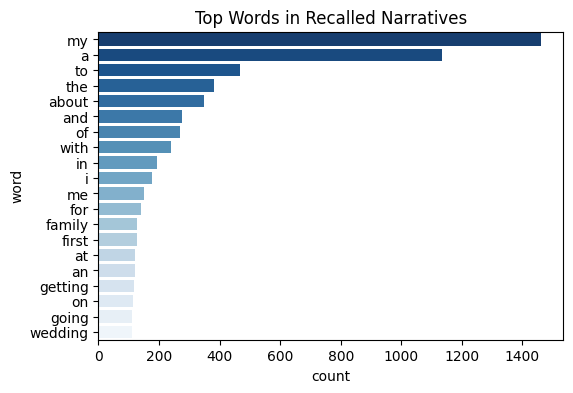

/tmp/ipython-input-825430283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, y='word', x='count', palette='Blues_r')


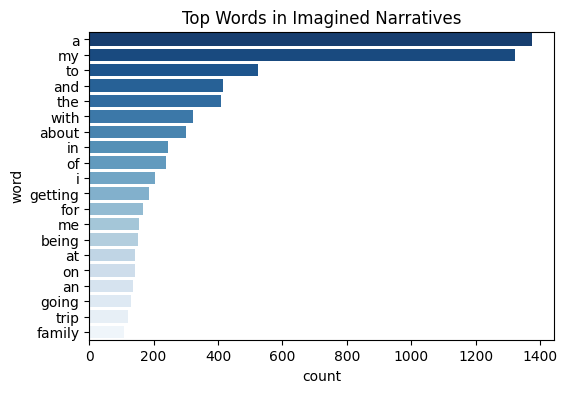

NameError: name 'WordCloud' is not defined

<Figure size 700x700 with 0 Axes>

In [ ]:
from collections import Counter

def get_top_words(texts, n=20):
    words = " ".join(texts).lower().split()
    common = Counter(words).most_common(n)
    return pd.DataFrame(common, columns=['word','count'])

for label in ['recalled','imagined']:
    subset = df[df['memType']==label]
    top = get_top_words(subset['mainEvent'])
    plt.figure(figsize=(6,4))
    sns.barplot(data=top, y='word', x='count', palette='Blues_r')
    plt.title(f"Top Words in {label.capitalize()} Narratives")
    plt.show()

# Word clouds
for label in ['recalled','imagined']:
    text = " ".join(df[df['memType']==label]['mainEvent'].astype(str))
    plt.figure(figsize=(7,7))
    wc = WordCloud(width=600,height=400,background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud – {label.capitalize()} Narratives")
    plt.show()


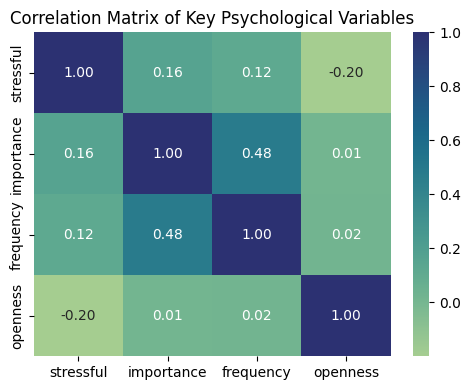

In [ ]:
corr_vars = ['stressful', 'importance', 'frequency', 'openness']
plt.figure(figsize=(5,4))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix of Key Psychological Variables")
plt.tight_layout()
plt.show()


/tmp/ipython-input-238121125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='memType', y='openness', palette='coolwarm', inner='quartile')


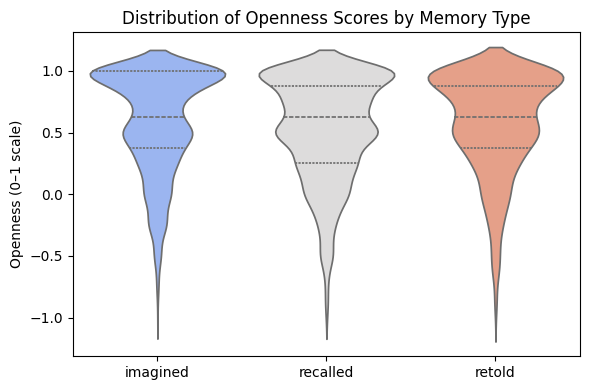

,count,mean,std,min,25%,50%,75%,max
memType,,,,,,,,
imagined,2756.0,0.58,0.42,-1.0,0.38,0.62,1.00,1.0
recalled,2779.0,0.53,0.42,-1.0,0.25,0.62,0.88,1.0
retold,1319.0,0.58,0.41,-1.0,0.38,0.62,0.88,1.0


In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='memType', y='openness', palette='coolwarm', inner='quartile')
plt.title("Distribution of Openness Scores by Memory Type")
plt.xlabel("")
plt.ylabel("Openness (0–1 scale)")
plt.tight_layout()
plt.show()

# Optional summary stats
df.groupby('memType')['openness'].describe().round(2)


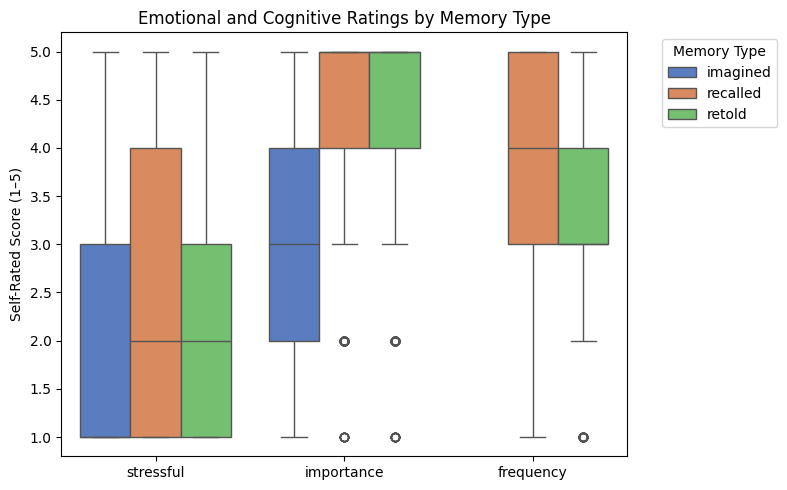

In [ ]:
# Select relevant columns for plotting
emotional_vars = ['stressful', 'importance', 'frequency']

# Melt the data for grouped plotting
melted = df.melt(id_vars='memType', value_vars=emotional_vars,
                 var_name='Rating Type', value_name='Score')

plt.figure(figsize=(8,5))
sns.boxplot(data=melted, x='Rating Type', y='Score', hue='memType', palette='muted')
plt.title("Emotional and Cognitive Ratings by Memory Type")
plt.xlabel("")
plt.ylabel("Self-Rated Score (1–5)")
plt.legend(title='Memory Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Concept test pilot run (vibe coded entirely)

In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean'] = df['mainEvent'].apply(clean_text)



In [ ]:
import spacy
from textblob import TextBlob
import numpy as np
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    doc = nlp(text)
    num_words = len(doc)
    avg_word_len = np.mean([len(t.text) for t in doc if t.is_alpha]) if num_words > 0 else 0
    num_nouns = len([t for t in doc if t.pos_ == "NOUN"])
    num_verbs = len([t for t in doc if t.pos_ == "VERB"])
    modal_count = len([t for t in doc if t.lemma_ in ["may","might","could","should","would","can"]])
    sentiment = TextBlob(text).sentiment.polarity
    return pd.Series({
        'num_words': num_words,
        'avg_word_len': avg_word_len,
        'noun_ratio': num_nouns / (num_words + 1e-5),
        'verb_ratio': num_verbs / (num_words + 1e-5),
        'modal_count': modal_count,
        'sentiment': sentiment
    })

features = df['clean'].apply(extract_features)
df = pd.concat([df, features], axis=1)
df.head()


,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,stressful,summary,timeSinceEvent,clean,num_words,avg_word_len,noun_ratio,verb_ratio,modal_count,sentiment
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,E9TY34YY,25.0,man,white,1.0,1.0,NaN,3.0,...,1.0,My boyfriend and I went to a concert together ...,90.0,attending a show,3.0,4.666667,0.333332,0.333332,0.0,0.00000
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,237K2NI1,25.0,woman,white,1.0,1.0,3.0,4.0,...,1.0,My boyfriend and I went to a concert together ...,90.0,a concert,2.0,4.000000,0.499998,0.000000,0.0,0.00000
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,FK5QTANB,35.0,woman,black,1.0,1.0,NaN,4.0,...,1.0,My sister gave birth to my twin niece and neph...,150.0,my sister having her twins a little early,8.0,4.250000,0.250000,0.125000,0.0,-0.04375
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,UYOSBBRS,30.0,woman,white,1.0,4.0,3.0,5.0,...,2.0,My sister gave birth to my twin niece and neph...,150.0,meeting my twin niece and nephew,6.0,4.500000,0.333333,0.166666,0.0,0.00000
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,34BFLNJV,25.0,man,white,2.0,2.0,NaN,3.0,...,4.0,It is always a journey for me to go to burning...,30.0,the consequences of going to burning man,7.0,4.857143,0.285714,0.285714,0.0,0.00000


In [ ]:
# Make sure memType is only "recalled" or "imagined"
df = df[df['memType'].isin(['recalled', 'imagined'])].copy()

# Map to numeric labels (0=recalled, 1=imagined)
df['label'] = df['memType'].map({'recalled': 0, 'imagined': 1})

# Drop any remaining rows with NaN in label or feature columns
df = df.dropna(subset=['label', 'mainEvent', 'clean'])

# (Recompute X and y safely)
X = df[['num_words','avg_word_len','noun_ratio','verb_ratio','modal_count','sentiment']].fillna(0)
y = df['label'].astype(int)

print("Shapes:", X.shape, y.shape)
print(y.value_counts())

Shapes: (5535, 6) (5535,)
label
0    2779
1    2756
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.2
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0      0.521     0.532     0.527       556
           1      0.518     0.506     0.512       551

    accuracy                          0.519      1107
   macro avg      0.519     0.519     0.519      1107
weighted avg      0.519     0.519     0.519      1107

ROC-AUC: 0.5359320529057697


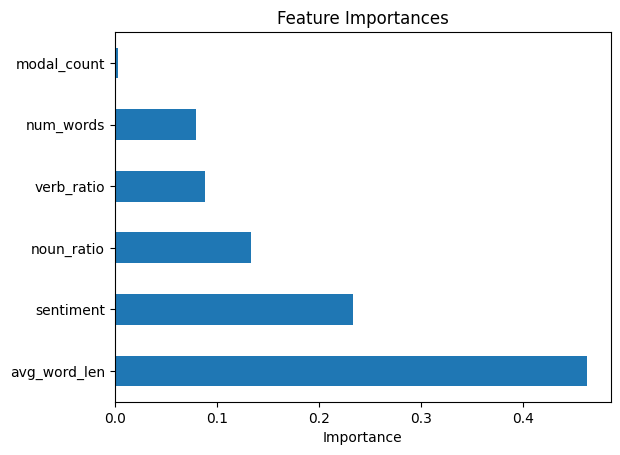

In [ ]:
import matplotlib.pyplot as plt

feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel("Importance")
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Use a light sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Get sentence embeddings
embeddings = model.encode(df['clean'].tolist(), show_progress_bar=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression on embeddings
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/173 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0      0.560     0.561     0.561       556
           1      0.556     0.555     0.556       551

    accuracy                          0.558      1107
   macro avg      0.558     0.558     0.558      1107
weighted avg      0.558     0.558     0.558      1107

ROC-AUC: 0.5767309927013018


In [ ]:
samples = [
    "The Eiffel Tower is located in Rome, Italy.",  # hallucinated
    "The Eiffel Tower is located in Paris, France.",  # factual
    "I think the Eiffel Tower might have been built by Leonardo da Vinci.",  # speculative
]

# Compute embeddings and scores
sample_embeds = model.encode(samples)
scores = clf.predict_proba(sample_embeds)[:, 1]

for s, sc in zip(samples, scores):
    print(f"Score={sc:.3f} | {s}")


Score=0.617 | The Eiffel Tower is located in Rome, Italy.
Score=0.516 | The Eiffel Tower is located in Paris, France.
Score=0.749 | I think the Eiffel Tower might have been built by Leonardo da Vinci.
